In [1]:
%matplotlib inline

In [2]:
import numpy
import random
from matplotlib import pyplot as plt
from win32com.client import Dispatch

In [3]:
dataB1 = [1, 1, 0]
dataB2 = [2, 1, 0]
dataB3 = [2, .5, 0]
dataB4 = [3, 1, 0]

dataR1 = [3, 1.5, 1]
dataR2 = [3.5, .5, 1]
dataR3 = [4, 1.5, 1]
dataR4 = [5.5, 1, 1]

# unknown type (flower color that we want to predict)
dataU = [4.5,  1, "it should be 1"]

all_points = [dataB1, dataB2, dataB3, dataB4, dataR1, dataR2, dataR3, dataR4]

def sigmoid(x):
    return 1/(1+ numpy.exp(-x))   

# derivative of sigmoid
def sigmoid_prime(x):
    return sigmoid(x) * ( 1 - sigmoid(x))

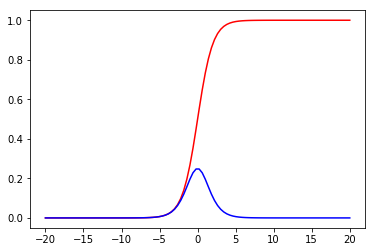

In [4]:
X = numpy.linspace(-20, 20, 100)
plt.plot(X, sigmoid(X), c = 'r')
plt.plot(X, sigmoid_prime(X), c = 'b')

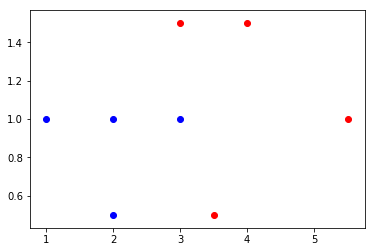

In [5]:
for i in range(len(all_points)):
    point = all_points[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c = color)  

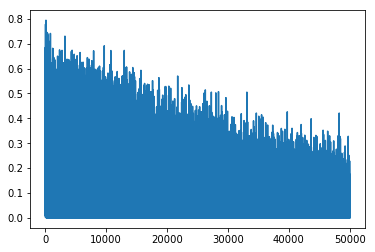

In [6]:
def train():
    w1 = numpy.random.randn()
    w2 = numpy.random.randn()
    b = numpy.random.randn()
    learning_rate = 0.3
    
    costs = []
    i=0
    while(i<50000):
        random_index = random.randint( 0, len(all_points) - 1)
        point = all_points[random_index]
        target = point[2]
        
        # feed forward
        z = w1 * point[0] + w2 * point[1] + b
        prediction = sigmoid(z)
        
        # comparing the model prediction with the target
        cost = (prediction - target) ** 2
        costs.append(cost)
        
        dcost_dpred = 2 * (prediction - target)
        
        dpred_dz = sigmoid(z) * (1-sigmoid(z))
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
        dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
        dcost_db =  dcost_dpred * dpred_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
        i = i + 1
    
    plt.plot(costs)
    
    return {'w1': w1, 'w2': w2, 'b': b}

training_response = train()

In [7]:
w1 = training_response['w1']
w2 = training_response['w2']
b = training_response['b']

In [8]:
def predict_flower(x, y):
    dataU_prediction = sigmoid(w1 * x + w2 * y + b)
    print(dataU_prediction)
    
    speak = Dispatch("SAPI.SpVoice")
    if dataU_prediction < 0.5:
        speak.Speak("Blue")
    else:
        speak.Speak("Red")

In [9]:
predict_flower(dataU[0], dataU[1]) # Red

0.999997707419


In [10]:
predict_flower(3, 0.5) # Blue

0.0810556849846
